In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift

# Tarea 1

Tarea obligatoria para entregar individualmente pero se recomienda trabajar y realizarla en grupos (de a 2 o 3 compañera/os), entreguen todos los integrantes consignando cuales fueron los compañerxs.

Descargar  y entregar la notebook con los resultados ( archivo tipo .ipynb)

1. Sea la señal  $f(t)= 7+3 cos(22\pi t)+sen(16 \pi t^{2})$  con  $t \in R$  medido en segundos.

2. Digitalice la señal  $f$  con un período de muestreo de $0.001 s$, en el intervalo  $t \in [0,0.8)$ 
Calcule la frecuencia de muestreo y la cantidad de muestras.

3. Grafique la señal muesteada en función del tiempo.

4. Calcule la transformada de Fourier de la señal muestreada punto $N=700$. Y grafique utilizanfo subplot, la parte real y la parte imaginaria por separado. 

5. Se puede reconstruir la señal muestreada en el item 1 utilizando el resultado del item 4? se ha realizado un Zero padding o un truncamiento?

### Ítem 1

Definimos la señal

Text(0.5, 1.0, 'Señal f(t)')

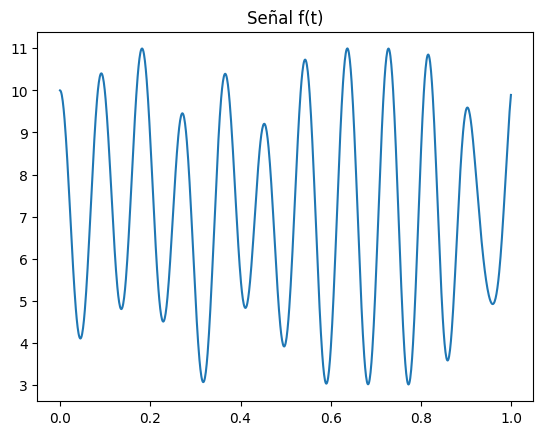

In [2]:
t = np.arange(0,1,0.001) # vector de tiempo para definir la señal
f = 7+(3*np.cos(22*np.pi*t))+np.sin(16*np.pi*t*t)

plt.plot(t,f)
plt.title("Señal f(t)")

### Ítem 2

Se genera el vector de tiempos discretizados:

In [3]:
# vector de tiempos discretizados
lf = 0.8 # longitud de f
pm = 0.001 # periodo de muestreo
tn = np.arange(0,0.8,pm)

# vuelvo a definir la señal con el nuevo t
f = 7+(3*np.cos(22*np.pi*tn))+np.sin(16*np.pi*tn*tn)

fm = 1/pm # frecuencia de muestreo
M = lf/pm # cant. de muestras (por regla de 3 simple)
print("Longitud del intervalo: ", lf)
print("Período de muestreo: ", pm)
print("Frecuencia de muestreo: ", fm)
print("El número de muestras: ", M)
print("Vector discretizado de tiempo: ", tn)


Longitud del intervalo:  0.8
Período de muestreo:  0.001
Frecuencia de muestreo:  1000.0
El número de muestras:  800.0
Vector discretizado de tiempo:  [0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059
 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071
 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083
 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095
 0.096 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106 0.107
 0.108 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118 0.119
 0.12  0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.129 0.13  0.131
 0.132 0.133 0.134 0.135 0.136 0.137 0.138 0.1

### Item 3

Grafico

Text(0.5, 1.0, 'Señal digitalizada')

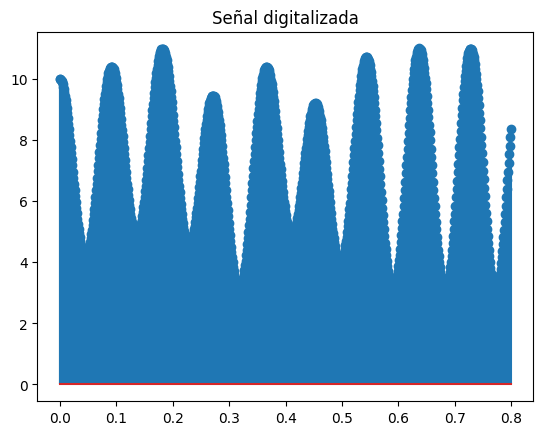

In [4]:
plt.stem(tn, f)
plt.title("Señal digitalizada")

### Ítem 4

Text(0.5, 1.0, 'DFT.N de f(t), parte IMAGINARIA')

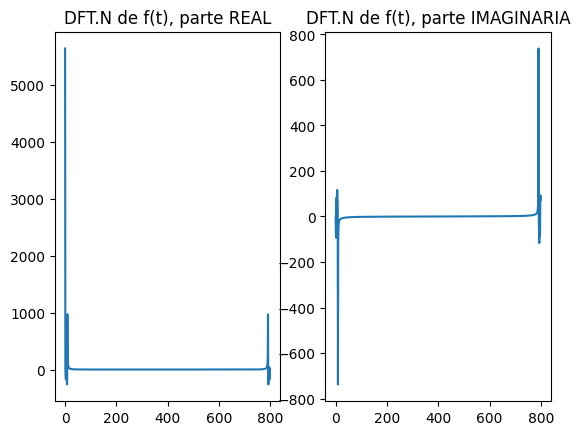

In [7]:
# numero de muestras con la que se calcula la DFT.N
N = 700
ftf = fft(f)

plt.subplot(121)
plt.plot(np.real(ftf))
plt.title("DFT.N de f(t), parte REAL")

plt.subplot(122)
plt.plot(np.imag(ftf))
plt.title("DFT.N de f(t), parte IMAGINARIA")

### Ítem 5

In [9]:
# Verificamos
print("¿Es M>N? ", M>N)
if(M>N):
    print("Se ha hecho un truncamiento. No se puede recuperar toda la señal original.")
else:
    print("Se ha hecho un zero-padding. Se puede recuperar toda la señal original.")

¿Es M>N?  True
Se ha hecho un truncamiento. No se puede recuperar toda la señal original.


C:\Users\diezf\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


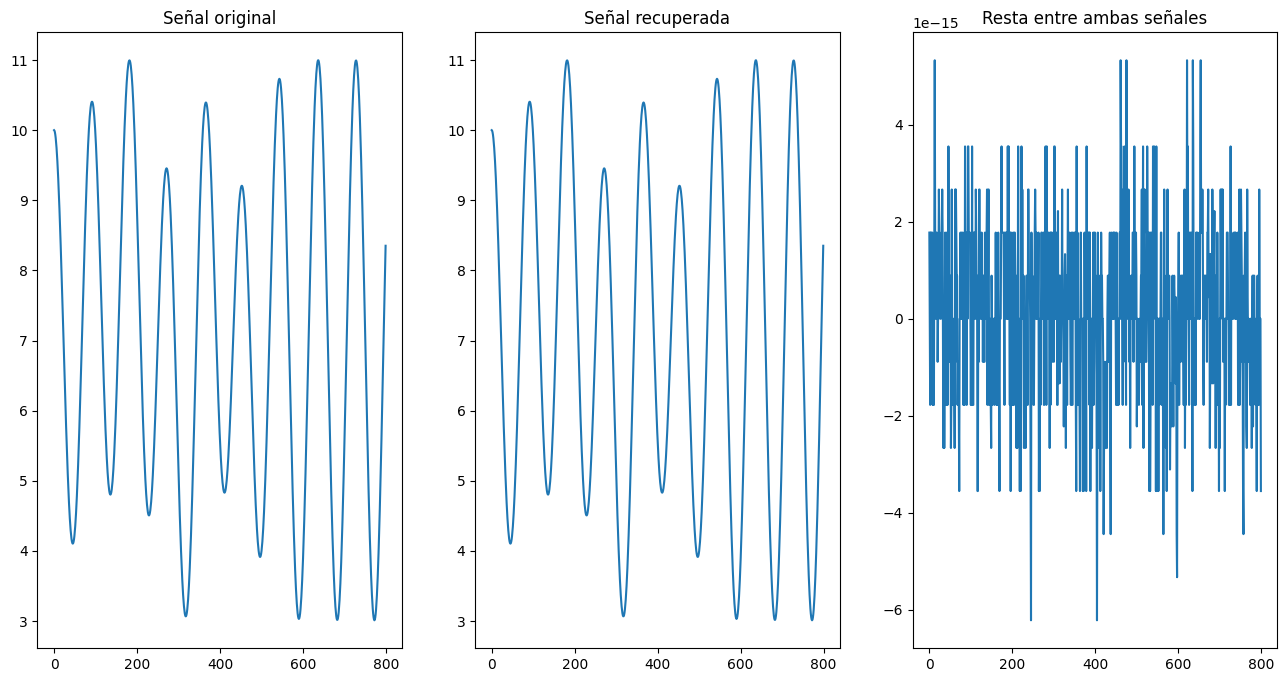

In [19]:
# verificamos antitransformando
f_recup = np.fft.ifft(ftf)

plt.figure(figsize=(16,8))
plt.subplot(131)
plt.plot(f)
plt.title("Señal original")

plt.subplot(132)
plt.plot(f_recup)
plt.title("Señal recuperada")

resta = (f_recup-f)

plt.subplot(133)
plt.plot(resta)
plt.title("Resta entre ambas señales")
plt.show()
